# Ultimate Challenge

###### Data    Analysis     Interview    Challenge    This     is     your     chance     to    wow     us    with     creative    and     rigorous     solutions!    Please     include     your     code     at  the    end     of     your     submission,     or     in     a     separate     file.    We    also    accept     incomplete     solutions. 
###### Part    1    ‑    Exploratory    data    analysis  
The    attached       logins.json       file     contains     (simulated)     timestamps    of    user     logins     in    a    particular  geographic     location.     Aggregate     these     login     counts    based    on    15­ minute     time     intervals,    and  visualize     and    describe     the     resulting     time     series    of     login     counts     in    ways     that    best     characterize     the  underlying    patterns     of     the    demand.     Please     report/illustrate     important     features    of     the    demand,  such     as    daily     cycles.     If     there     are     data     quality     issues,    please     report     them. 
###### Part    2    ‑    Experiment    and    metrics    design  
The    neighboring     cities    of    Gotham    and    Metropolis    have     complementary     circadian     rhythms:     on  weekdays,    Ultimate    Gotham     is    most     active    at    night,    and    Ultimate    Metropolis     is    most    active  during     the    day.    On    weekends,     there     is     reasonable    activity     in    both     cities.    However,    a     toll    bridge,     with     a     two  ­way     toll,    between     the     two     cities     causes    driver    partners     to     tend  to    be    exclusive     to    each     city.     The     Ultimate    managers    of     city    operations     for     the     two     cities    have  proposed    an    experiment     to     encourage    driver    partners     to    be    available     in    both     cities,    by  reimbursing    all     toll     costs.  1. What    would     you     choose     as     the     key    measure    of     success    of     this    experiment     in  encouraging    driver     partners     to     serve    both     cities,    and    why    would     you     choose     this    metric?  2. Describe    a    practical     experiment     you    would    design     to     compare     the    effectiveness    of     the  proposed     change     in     relation     to     the     key    measure    of     success.    Please    provide    details     on:   a. how     you    will     implement     the    experiment  b. what     statistical     test(s)     you    will     conduct     to     verify     the     significance    of     the  observation  c. how     you    would     interpret     the     results    and    provide     recommendations     to     the     city  operations     team    along    with    any     caveats. 
###### Part    3    ‑    Predictive     modeling    
Ultimate     is     interested     in     predicting     rider     retention.    To    help    explore     this    question,    we    have  provided     a     sample    dataset     of     a     cohort    of    users    who     signed    up     for    an    Ultimate    account     in January    2014.    The     data    was    pulled     several    months     later;    we     consider    a    user     retained     if     they  were     “active”     (i.e.     took    a     trip)     in     the     preceding    30    days.    We     would     like     you     to    use     this    data     set     to    help    understand    what     factors    are     the    best    predictors  for     retention,    and    offer     suggestions     to     operationalize     those     insights     to    help    Ultimate.    The    data     is     in     the    attached     file     ultimate_data_challenge.json.    See    below     for    a    detailed  description     of     the    dataset.     Please     include    any     code     you    wrote     for     the    analysis    and    delete     the  dataset    when     you    have     finished     with     the     challenge.    1. Perform    any     cleaning,     exploratory    analysis,    and/or     visualizations     to    use     the    provided  data     for     this    analysis     (a     few     sentences/plots    describing     your    approach    will     suffice).    What  fraction     of     the    observed     users    were     retained?  2. Build    a    predictive     model     to     help    Ultimate    determine    whether    or    not    a    user    will    be    active  in     their    6th    month     on     the     system.    Discuss    why     you     chose     your    approach,    what  alternatives     you     considered,     and    any     concerns     you    have.    How     valid     is     your    model?  Include    any     key     indicators    of     model    performance.  3. Briefly    discuss    how     Ultimate     might     leverage     the     insights    gained     from     the    model     to  improve     its     long­  term     rider     retention     (again,    a     few     sentences    will     suffice).   
###### Data    description  
● city:       city     this    user     signed     up     in  
● phone:      primary    device     for     this    user  
● signup_date:      date     of     account     registration;     in     the     form     ‘YYYY MM DD’  
● last_trip_date:       the     last     time     this    user     completed    a     trip;     in     the     form     ‘YYYY MM DD’  
● avg_dist:       the    average     distance     in    miles    per     trip     taken     in     the     first    30    days    after     signup  
● avg_rating_by_driver:       the     rider’s    average     rating    over    all    of     their     trips  
● avg_rating_of_driver:       the     rider’s    average     rating    of     their    drivers    over    all    of     their     trips  
● surge_pct:       the    percent     of     trips     taken    with     surge    multiplier    >    1  
● avg_surge:       The    average     surge    multiplier    over    all    of     this    user’s     trips  
● trips_in_first_30_days:       the     number    of     trips     this    user     took     in     the     first    30    days    after  signing    up   
● ultimate_black_user:       TRUE     if     the    user     took    an    Ultimate    Black     in     their     first    30    days;  FALSE    otherwise  
● weekday_pct:       the     percent     of     the    user’s     trips    occurring    during    a    weekday 


In [1]:
import pandas as pd
import gzip
import matplotlib.pyplot as plt
import datetime
import calendar
import numpy as np
from string import punctuation
from __future__ import division
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize
from nltk.tokenize import regexp_tokenize
import re
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
plt.style.use('fivethirtyeight')
from IPython.core.debugger import Pdb
import time
from datetime import datetime
from dateutil.parser import parse

#### Part 1 - EDA

In [2]:
df_logins = pd.read_json('logins.json')

In [3]:
df_logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
df_logins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [5]:
#Resampling
rng = pd.date_range(start = '1970-01-01 20:12:16', end= '1970-04-13 18:57:38', freq = '15T')
rng

DatetimeIndex(['1970-01-01 20:12:16', '1970-01-01 20:27:16',
               '1970-01-01 20:42:16', '1970-01-01 20:57:16',
               '1970-01-01 21:12:16', '1970-01-01 21:27:16',
               '1970-01-01 21:42:16', '1970-01-01 21:57:16',
               '1970-01-01 22:12:16', '1970-01-01 22:27:16',
               ...
               '1970-04-13 16:42:16', '1970-04-13 16:57:16',
               '1970-04-13 17:12:16', '1970-04-13 17:27:16',
               '1970-04-13 17:42:16', '1970-04-13 17:57:16',
               '1970-04-13 18:12:16', '1970-04-13 18:27:16',
               '1970-04-13 18:42:16', '1970-04-13 18:57:16'],
              dtype='datetime64[ns]', length=9788, freq='15T')

In [6]:
sorted_ts = df_logins.login_time.sort_values()

df_sorted = pd.DataFrame(sorted_ts)

df_sorted['login_counts'] = 1

df_sorted.reset_index(drop=True, inplace=True)

df_grp = df_sorted.groupby('login_time').count()

In [7]:
?df_grp.resample()

#### 15 min Sampling of Login Counts

In [8]:
converted_15min = df_grp.resample('15Min', label='right').count()

df_converted_15min = pd.DataFrame(converted_15min)

df_converted_15min = df_converted_15min.reset_index()

df_converted_15min.info()

df_15min_low = df_converted_15min.loc[(df_converted_15min.login_counts >= 0) & (df_converted_15min.login_counts <= 2) & (df_converted_15min.login_time >= '1970-01-03') & (df_converted_15min.login_time <='1970-01-06')]
# df_15min_low

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9788 entries, 0 to 9787
Data columns (total 2 columns):
login_time      9788 non-null datetime64[ns]
login_counts    9788 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 153.0 KB


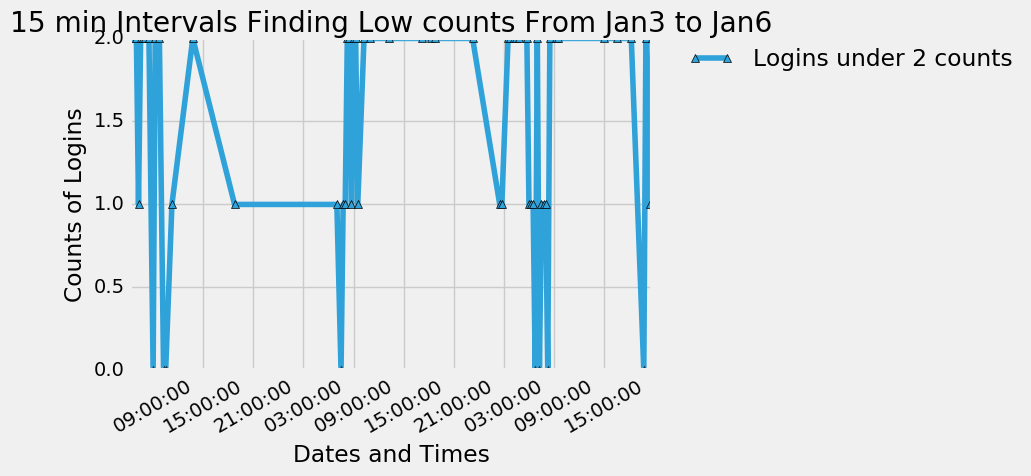

In [9]:
# fig, ax = plt.subplots()
plt.plot(df_15min_low['login_time'],df_15min_low['login_counts'],  marker = '^', label= 'Logins under 2 counts')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('15 min Intervals Finding Low counts From Jan3 to Jan6')
plt.xlabel('Dates and Times')
plt.ylabel('Counts of Logins')
plt.xticks(rotation = '30')
plt.style.use('fivethirtyeight')
plt.show()

In [10]:
df_15min_high = df_converted_15min.loc[(df_converted_15min.login_counts >= 20) & (df_converted_15min.login_time >= '1970-01-03') & (df_converted_15min.login_time <='1970-01-06')]
# df_15min_high

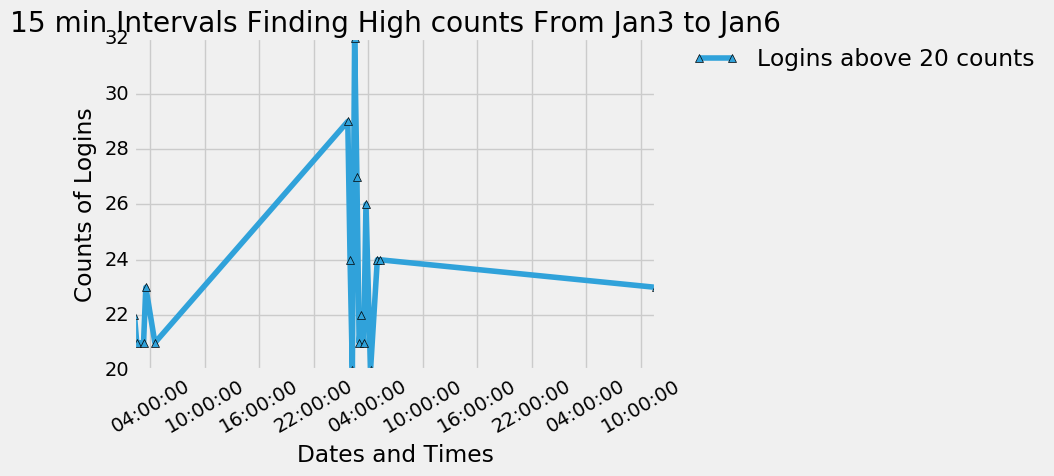

In [11]:
# fig, ax = plt.subplots()
plt.plot(df_15min_high['login_time'],df_15min_high['login_counts'],  marker = '^', label='Logins above 20 counts')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('15 min Intervals Finding High counts From Jan3 to Jan6')
plt.xlabel('Dates and Times')
plt.ylabel('Counts of Logins')
plt.xticks(rotation = '30')
plt.show()

(array([719213.  , 719213.25, 719213.5 , 719213.75, 719214.  , 719214.25,
        719214.5 , 719214.75, 719215.  ]),
 <a list of 9 Text xticklabel objects>)

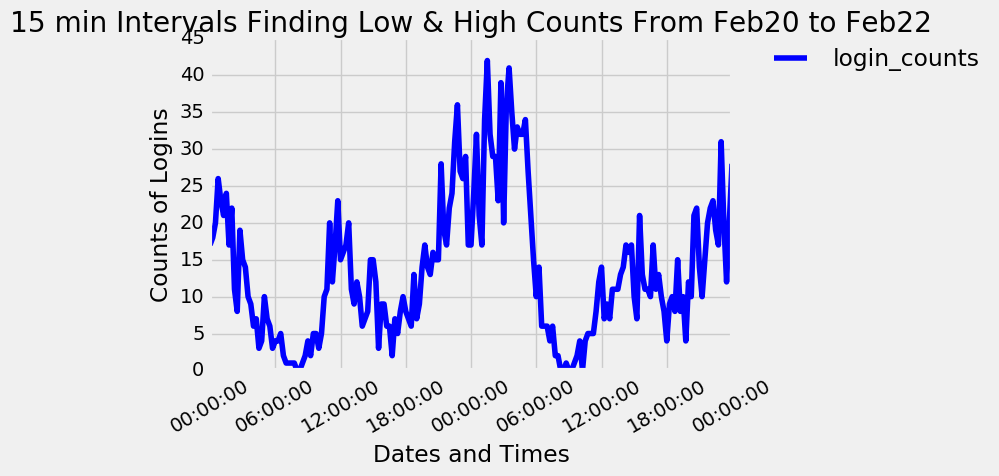

In [12]:
df_15min_daysnap = df_converted_15min.loc[(df_converted_15min['login_time'] >= '1970-02-20 00:00:00') & (df_converted_15min['login_time'] <= '1970-02-22 00:00:00')]
# Mon== 0 and Sunday==6
# 15min_daysnap['login_dayofweek'] = [logintime.weekday() for logintime in 15min_daysnap.login_time]
# 15min_daysnap
plt.plot(df_15min_daysnap['login_time'],df_15min_daysnap['login_counts'], color = 'blue')
plt.title('15 min Intervals Finding Low & High Counts From Feb20 to Feb22')
plt.xlabel('Dates and Times')
plt.ylabel('Counts of Logins')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation = '30')

In [13]:
converted_15min_lag = converted_15min.shift(-96)

(array([719171., 719185., 719199., 719213., 719227., 719241., 719255.]),
 <a list of 7 Text xticklabel objects>)

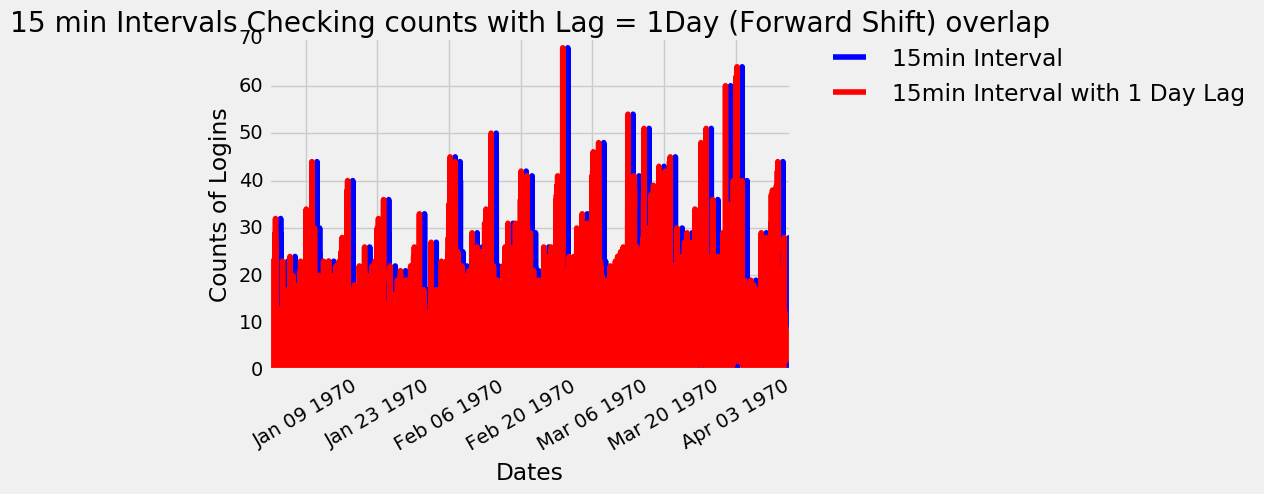

In [14]:
plt.plot(converted_15min, color = 'blue', label='15min Interval')
plt.plot(converted_15min_lag, color = 'red', label='15min Interval with 1 Day Lag')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('15 min Intervals Checking counts with Lag = 1Day (Forward Shift) overlap')
plt.xlabel('Dates')
plt.ylabel('Counts of Logins')
plt.xticks(rotation = '30')

In [15]:
# Rolling [window=40,center=False,axis=0]
r_15min = converted_15min.rolling(window = 40)

(array([719171., 719185., 719199., 719213., 719227., 719241., 719255.]),
 <a list of 7 Text xticklabel objects>)

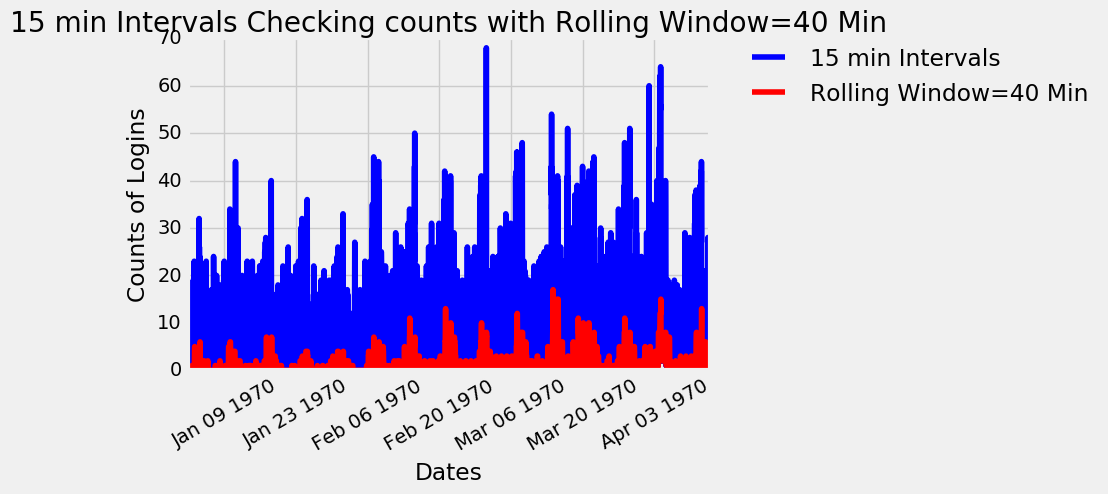

In [16]:
plt.plot(converted_15min, color = 'blue', label='15 min Intervals')
plt.plot(r_15min.min()['login_counts'], color = 'red', label='Rolling Window=40 Min')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('15 min Intervals Checking counts with Rolling Window=40 Min')
plt.xlabel('Dates')
plt.ylabel('Counts of Logins')
plt.xticks(rotation = '30')

#### Daily Sampling of Login Counts

In [17]:
converted_daily = df_grp.resample('D', label='right').count()

In [18]:
converted_daily_lag = converted_daily.shift(-1)

In [19]:
# Rolling [window=40,center=False,axis=0]
r_daily = converted_daily.rolling(window = 5)

(array([719172., 719186., 719200., 719214., 719228., 719242., 719256.]),
 <a list of 7 Text xticklabel objects>)

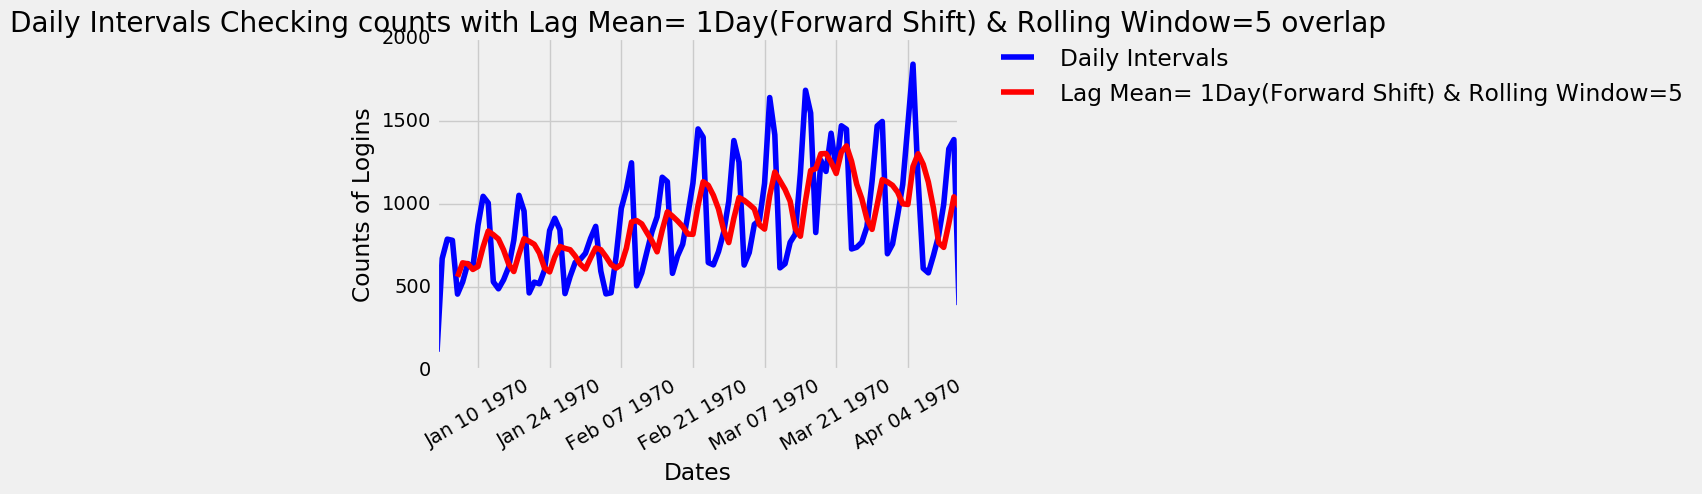

In [20]:
plt.plot(converted_daily, color = 'blue', label='Daily Intervals')
plt.plot(r_daily.mean()['login_counts'], color = 'red', label='Lag Mean= 1Day(Forward Shift) & Rolling Window=5')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Daily Intervals Checking counts with Lag Mean= 1Day(Forward Shift) & Rolling Window=5 overlap')
plt.xlabel('Dates')
plt.ylabel('Counts of Logins')
plt.xticks(rotation = '30')

In [21]:
# df_converted_daily = []
df_converted_daily = pd.DataFrame(converted_daily)

In [22]:
df_converted_daily= df_converted_daily.reset_index()

In [23]:
df_daily_weeksnapshot = df_converted_daily.loc[(df_converted_daily.login_time >= '01-01-1970') & (df_converted_daily.login_time <= '01-15-1970')]
daily_weeksnap= df_daily_weeksnapshot.reset_index(drop=True)

In [24]:
# Mon== 0 and Sunday==6
daily_weeksnap['login_dayofweek'] = [logintime.weekday() for logintime in daily_weeksnap.login_time]
# daily_weeksnap

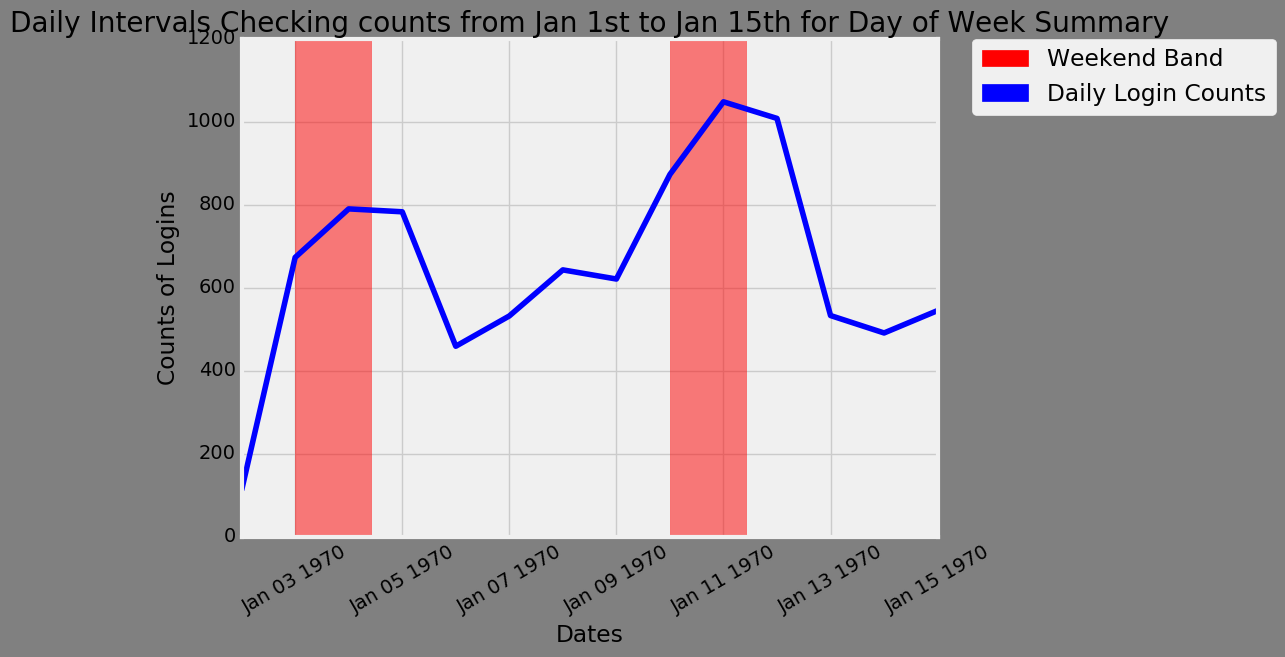

In [25]:
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='red', label='Weekend Band')
blue_patch = mpatches.Patch(color='blue', label='Daily Login Counts')
sns.set_palette('muted')

fig, ax1 = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('grey')
ax1.plot(daily_weeksnap['login_time'],daily_weeksnap['login_counts'], color = 'blue')
# Mon== 0 and Sunday==6
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, blue_patch])
plt.title('Daily Intervals Checking counts from Jan 1st to Jan 15th for Day of Week Summary')
plt.xlabel('Dates')
ax1.set_ylabel('Counts of Logins')
plt.xticks(rotation = '30')
ax1.axvspan('1970-01-03 00:00:00','1970-01-04 10:00:00',alpha=.5,color='red')
ax1.axvspan('1970-01-10 00:00:00','1970-01-11 10:00:00',alpha=.5,color='red')

In [26]:
df_daily_Marweeksnapshot = df_converted_daily.loc[(df_converted_daily.login_time >= '03-07-1970') & (df_converted_daily.login_time <= '03-21-1970')]
daily_Marweeksnap= df_daily_Marweeksnapshot.reset_index(drop=True)
# Mon== 0 and Sunday==6
daily_Marweeksnap['login_dayofweek'] = [logintime.weekday() for logintime in daily_Marweeksnap.login_time]
daily_Marweeksnap

,login_time,login_counts,login_dayofweek
0,1970-03-07,1126,5
1,1970-03-08,1643,6
2,1970-03-09,1418,0
3,1970-03-10,617,1
4,1970-03-11,642,2
5,1970-03-12,771,3
6,1970-03-13,820,4
7,1970-03-14,1189,5
8,1970-03-15,1687,6
9,1970-03-16,1550,0


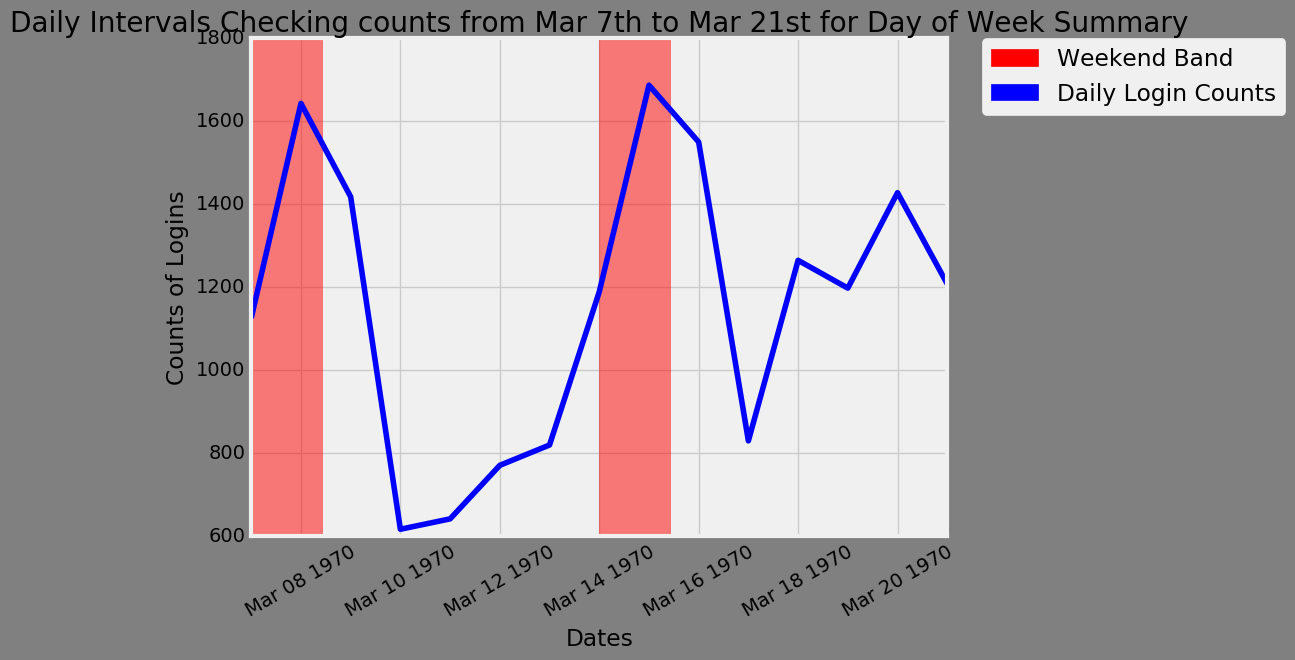

In [27]:
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='red', label='Weekend Band')
blue_patch = mpatches.Patch(color='blue', label='Daily Login Counts')
sns.set_palette('muted')

fig, ax1 = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('grey')
ax1.plot(daily_Marweeksnap['login_time'],daily_Marweeksnap['login_counts'], color = 'blue')
# Mon== 0 and Sunday==6
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, blue_patch])
plt.title('Daily Intervals Checking counts from Mar 7th to Mar 21st for Day of Week Summary')
plt.xlabel('Dates')
ax1.set_ylabel('Counts of Logins')
plt.xticks(rotation = '30')
ax1.axvspan('1970-03-07 00:00:00','1970-03-08 10:00:00',alpha=.5,color='red')
ax1.axvspan('1970-03-14 00:00:00','1970-03-15 10:00:00',alpha=.5,color='red')

C:\Program Files\Anaconda33\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=7).mean()
  from ipykernel import kernelapp as app


(array([719172., 719186., 719200., 719214., 719228., 719242., 719256.]),
 <a list of 7 Text xticklabel objects>)

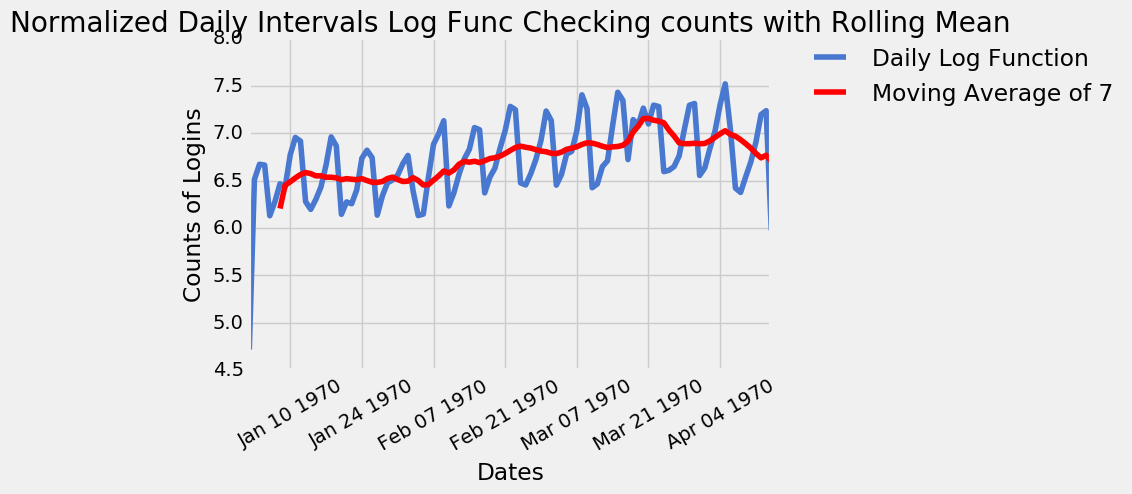

In [28]:
converted_daily_log = np.log(converted_daily)
moving_avg = pd.rolling_mean(converted_daily_log,7)
plt.plot(converted_daily_log, label='Daily Log Function')
plt.plot(moving_avg, color='red', label='Moving Average of 7')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Normalized Daily Intervals Log Func Checking counts with Rolling Mean')
plt.xlabel('Dates')
plt.ylabel('Counts of Logins')
plt.xticks(rotation = '30')

###### Above graphs show that weekend and midnight to 4 a.m. have higher activity than other time of the week and and day accordingly.

#### Part 2 - Experiment and Metrics Design
The    neighboring     cities    of    Gotham    and    Metropolis    have     complementary     circadian     rhythms:     on  weekdays,    Ultimate    Gotham     is    most     active    at    night,    and    Ultimate    Metropolis     is    most    active  during     the    day.    On    weekends,     there     is     reasonable    activity     in    both     cities.    However,    a     toll    bridge,     with     a     two  ­way     toll,    between     the     two     cities     causes    driver    partners     to     tend  to    be    exclusive     to    each     city.     The     Ultimate    managers    of     city    operations     for     the     two     cities    have  proposed    an    experiment     to     encourage    driver    partners     to    be    available     in    both     cities,    by  reimbursing    all     toll     costs.  
1. What    would     you     choose     as     the     key    measure    of     success    of     this    experiment     in  encouraging    driver     partners     to     serve    both     cities,    and    why    would     you     choose     this    metric?  
2. Describe    a    practical     experiment     you    would    design     to     compare     the    effectiveness    of     the  proposed     change     in     relation     to     the     key    measure    of     success.    Please    provide    details     on:   
a. how     you    will     implement     the    experiment  
b. what     statistical     test(s)     you    will     conduct     to     verify     the     significance    of     the  observation  
c. how     you    would     interpret     the     results    and    provide     recommendations     to     the     city  operations     team    along    with    any     caveats. 

#### 
#### 1.The key measure in this experiment would be the toll counts or toll dollars the specific driver adds up over the course of the experiment.  These toll counts or dollars can then be seen as a measure of success of drivers going between the 2 cities.  This feature means that the driver is moving between the 2 chosen cities more effectively.
#### 2. I would choose to implement an A/B test 
#### a. Where the population of drivers would be divided into those that get reimbursed and those that do not, without them knowing that they will get reimbursed.
#### b. The statistical test would be the t-test or z-score test.
#### c.  If the results showed positive signs and higher percentages with group B( the reimbursed group) then this experiment would be marked as a success, else otherwise.


###### Part    3    ‑    Predictive     modeling    
Ultimate     is     interested     in     predicting     rider     retention.    To    help    explore     this    question,    we    have  provided     a     sample    dataset     of     a     cohort    of    users    who     signed    up     for    an    Ultimate    account     in January    2014.    The     data    was    pulled     several    months     later;    we     consider    a    user     retained     if     they  were     “active”     (i.e.     took    a     trip)     in     the     preceding    30    days.    We     would     like     you     to    use     this    data     set     to    help    understand    what     factors    are     the    best    predictors  for     retention,    and    offer     suggestions     to     operationalize     those     insights     to    help    Ultimate.    The    data     is     in     the    attached     file     ultimate_data_challenge.json.    See    below     for    a    detailed  description     of     the    dataset.     Please     include    any     code     you    wrote     for     the    analysis    and    delete     the  dataset    when     you    have     finished     with     the     challenge.    
1. Perform    any     cleaning,     exploratory    analysis,    and/or     visualizations     to    use     the    provided  data     for     this    analysis     (a     few     sentences/plots    describing     your    approach    will     suffice).    What  fraction     of     the    observed     users    were     retained?  
2. Build    a    predictive     model     to     help    Ultimate    determine    whether    or    not    a    user    will    be    active  in     their    6th    month     on     the     system.    Discuss    why     you     chose     your    approach,    what  alternatives     you     considered,     and    any     concerns     you    have.    How     valid     is     your    model?  Include    any     key     indicators    of     model    performance.  
3. Briefly    discuss    how     Ultimate     might     leverage     the     insights    gained     from     the    model     to  improve     its     long­  term     rider     retention     (again,    a     few     sentences    will     suffice).

In [29]:
import json
with open('ultimate_data_challenge.json', 'r') as datafile:
    data = json.load(datafile)
df_ultimate = pd.DataFrame(data)

In [30]:
df_ultimate

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


In [31]:
df_ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [32]:
df_ultimate['avg_rating_by_driver'].fillna(df_ultimate['avg_rating_by_driver'].mean(), inplace = True)
df_ultimate['avg_rating_of_driver'].fillna(df_ultimate['avg_rating_of_driver'].mean(), inplace = True)
df_ultimate['phone'].fillna(method='ffill', inplace = True)

In [33]:
df_ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [34]:
print(df_ultimate.city.unique())
print(df_ultimate.phone.unique())
print(df_ultimate.ultimate_black_user.unique())

["King's Landing" 'Astapor' 'Winterfell']
['iPhone' 'Android']
[True False]


In [35]:
Citydummies = pd.get_dummies(df_ultimate['city'],prefix = 'city').astype(int)
Phonedummies = pd.get_dummies(df_ultimate['phone'],prefix = 'phone').astype(int)
ultimate_black_userdummies = pd.get_dummies(df_ultimate['ultimate_black_user'],prefix = 'ultimate_black_user').astype(int)


In [36]:
Dummied_df_ultimate = pd.concat([Citydummies,Phonedummies, df_ultimate.signup_date,df_ultimate.last_trip_date, df_ultimate.avg_dist, df_ultimate.avg_rating_by_driver, df_ultimate.avg_rating_of_driver, df_ultimate.surge_pct, df_ultimate.avg_surge, df_ultimate.trips_in_first_30_days, ultimate_black_userdummies,df_ultimate.weekday_pct],axis=1)

In [37]:
Dummied_df_ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
city_Astapor                 50000 non-null int32
city_King's Landing          50000 non-null int32
city_Winterfell              50000 non-null int32
phone_Android                50000 non-null int32
phone_iPhone                 50000 non-null int32
signup_date                  50000 non-null object
last_trip_date               50000 non-null object
avg_dist                     50000 non-null float64
avg_rating_by_driver         50000 non-null float64
avg_rating_of_driver         50000 non-null float64
surge_pct                    50000 non-null float64
avg_surge                    50000 non-null float64
trips_in_first_30_days       50000 non-null int64
ultimate_black_user_False    50000 non-null int32
ultimate_black_user_True     50000 non-null int32
weekday_pct                  50000 non-null float64
dtypes: float64(6), int32(7), int64(1), object(2)
memory usage: 4.8+ MB


In [38]:
pd.to_datetime(Dummied_df_ultimate['last_trip_date'][0]) - pd.to_datetime(Dummied_df_ultimate['signup_date'][0])

Timedelta('143 days 00:00:00')

In [39]:
Dummied_df_ultimate['last_trip_date']= [pd.to_datetime(lasttripdate) for lasttripdate in Dummied_df_ultimate['last_trip_date']]
Dummied_df_ultimate['signup_date'] = [pd.to_datetime(signupdate) for signupdate in Dummied_df_ultimate['signup_date']]

In [40]:
Dummied_df_ultimate

,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,signup_date,last_trip_date,avg_dist,avg_rating_by_driver,avg_rating_of_driver,surge_pct,avg_surge,trips_in_first_30_days,ultimate_black_user_False,ultimate_black_user_True,weekday_pct
0,0,1,0,0,1,2014-01-25,2014-06-17,3.67,5.0,4.700000,15.4,1.10,4,0,1,46.2
1,1,0,0,1,0,2014-01-29,2014-05-05,8.26,5.0,5.000000,0.0,1.00,0,1,0,50.0
2,1,0,0,0,1,2014-01-06,2014-01-07,0.77,5.0,4.300000,0.0,1.00,3,1,0,100.0
3,0,1,0,0,1,2014-01-10,2014-06-29,2.36,4.9,4.600000,20.0,1.14,9,0,1,80.0
4,0,0,1,1,0,2014-01-27,2014-03-15,3.13,4.9,4.400000,11.8,1.19,14,1,0,82.4
5,0,0,1,0,1,2014-01-09,2014-06-06,10.56,5.0,3.500000,0.0,1.00,2,0,1,100.0
6,1,0,0,1,0,2014-01-24,2014-01-25,3.95,4.0,4.601559,0.0,1.00,1,1,0,100.0
7,0,0,1,0,1,2014-01-28,2014-01-29,2.04,5.0,5.000000,0.0,1.00,2,1,0,100.0
8,0,0,1,1,0,2014-01-21,2014-02-01,4.36,5.0,4.500000,0.0,1.00,2,1,0,100.0
9,0,0,1,1,0,2014-01-03,2014-01-05,2.37,5.0,4.601559,0.0,1.00,1,1,0,0.0


In [41]:
from datetime import datetime, date, time, timedelta

dfdiffdate = pd.DataFrame()
dfdiffdate['last_trip_date']= Dummied_df_ultimate['last_trip_date']
dfdiffdate['signup_date']= Dummied_df_ultimate['signup_date']
dfdiffdate['6mthsdate'] = [(ltripdate - supdate) for ltripdate,supdate in zip(Dummied_df_ultimate['last_trip_date'],Dummied_df_ultimate['signup_date'])]
dfdiffdate['last30date'] = [(ltripdate - pd.to_datetime('2014-06-01')) for ltripdate in Dummied_df_ultimate['last_trip_date']]
# print([dfdiffdate['ddate']> timedelta(days=180)])

In [42]:
dfdiffdate

,last_trip_date,signup_date,6mthsdate,last30date
0,2014-06-17,2014-01-25,143 days,16 days
1,2014-05-05,2014-01-29,96 days,-27 days
2,2014-01-07,2014-01-06,1 days,-145 days
3,2014-06-29,2014-01-10,170 days,28 days
4,2014-03-15,2014-01-27,47 days,-78 days
5,2014-06-06,2014-01-09,148 days,5 days
6,2014-01-25,2014-01-24,1 days,-127 days
7,2014-01-29,2014-01-28,1 days,-123 days
8,2014-02-01,2014-01-21,11 days,-120 days
9,2014-01-05,2014-01-03,2 days,-147 days


In [43]:
from datetime import datetime, date, time, timedelta
# Use lambda function and timedelta
Dummied_df_ultimate['active'] = [1 if (timedelta(days=0) <= lendays <= timedelta(days=30)) else 0 for lendays in dfdiffdate['last30date']]
Dummied_df_ultimate['6mthsactive'] = [1 if lendays >= timedelta(days=180) else 0 for lendays in dfdiffdate['6mthsdate']]

Dummied_df_ultimate
# Dummied_df_ultimate.groupby('6mthsactive').count

,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,signup_date,last_trip_date,avg_dist,avg_rating_by_driver,avg_rating_of_driver,surge_pct,avg_surge,trips_in_first_30_days,ultimate_black_user_False,ultimate_black_user_True,weekday_pct,active,6mthsactive
0,0,1,0,0,1,2014-01-25,2014-06-17,3.67,5.0,4.700000,15.4,1.10,4,0,1,46.2,1,0
1,1,0,0,1,0,2014-01-29,2014-05-05,8.26,5.0,5.000000,0.0,1.00,0,1,0,50.0,0,0
2,1,0,0,0,1,2014-01-06,2014-01-07,0.77,5.0,4.300000,0.0,1.00,3,1,0,100.0,0,0
3,0,1,0,0,1,2014-01-10,2014-06-29,2.36,4.9,4.600000,20.0,1.14,9,0,1,80.0,1,0
4,0,0,1,1,0,2014-01-27,2014-03-15,3.13,4.9,4.400000,11.8,1.19,14,1,0,82.4,0,0
5,0,0,1,0,1,2014-01-09,2014-06-06,10.56,5.0,3.500000,0.0,1.00,2,0,1,100.0,1,0
6,1,0,0,1,0,2014-01-24,2014-01-25,3.95,4.0,4.601559,0.0,1.00,1,1,0,100.0,0,0
7,0,0,1,0,1,2014-01-28,2014-01-29,2.04,5.0,5.000000,0.0,1.00,2,1,0,100.0,0,0
8,0,0,1,1,0,2014-01-21,2014-02-01,4.36,5.0,4.500000,0.0,1.00,2,1,0,100.0,0,0
9,0,0,1,1,0,2014-01-03,2014-01-05,2.37,5.0,4.601559,0.0,1.00,1,1,0,0.0,0,0


In [44]:
df1 = Dummied_df_ultimate.ix[Dummied_df_ultimate['active']==1]
df1.describe()

,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,avg_dist,avg_rating_by_driver,avg_rating_of_driver,surge_pct,avg_surge,trips_in_first_30_days,ultimate_black_user_False,ultimate_black_user_True,weekday_pct,active,6mthsactive
count,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,18804.0,18804.000000
mean,0.224846,0.338385,0.436769,0.169592,0.830408,5.114788,4.762801,4.593679,9.152797,1.073809,3.306318,0.494948,0.505052,61.389034,1.0,0.004520
std,0.417473,0.473177,0.495982,0.375317,0.375317,4.615175,0.328175,0.518319,15.588704,0.163170,4.986743,0.499981,0.499981,29.487584,0.0,0.067083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,2.560000,4.700000,4.400000,0.000000,1.000000,0.000000,0.000000,0.000000,44.400000,1.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,3.730000,4.800000,4.700000,0.000000,1.000000,2.000000,0.000000,1.000000,64.300000,1.0,0.000000
75%,0.000000,1.000000,1.000000,0.000000,1.000000,5.890000,5.000000,5.000000,13.300000,1.090000,4.000000,1.000000,1.000000,84.600000,1.0,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,160.960000,5.000000,5.000000,100.000000,4.500000,125.000000,1.000000,1.000000,100.000000,1.0,1.000000


In [45]:
Percentage_Retained = 18804/50000 * 100
print(Percentage_Retained)

37.608000000000004


In [46]:
df2 = Dummied_df_ultimate.ix[Dummied_df_ultimate['6mthsactive']==1]
df2.describe()

,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,avg_dist,avg_rating_by_driver,avg_rating_of_driver,surge_pct,avg_surge,trips_in_first_30_days,ultimate_black_user_False,ultimate_black_user_True,weekday_pct,active,6mthsactive
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.0,85.0
mean,0.105882,0.400000,0.494118,0.141176,0.858824,4.455882,4.767059,4.610643,10.537647,1.079529,3.788235,0.564706,0.435294,63.456471,1.0,1.0
std,0.309513,0.492805,0.502932,0.350270,0.350270,4.018749,0.191105,0.491843,14.042876,0.125726,7.403497,0.498738,0.498738,24.001971,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.410000,4.200000,2.700000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
25%,0.000000,0.000000,0.000000,0.000000,1.000000,2.370000,4.700000,4.500000,0.000000,1.000000,0.000000,0.000000,0.000000,50.000000,1.0,1.0
50%,0.000000,0.000000,0.000000,0.000000,1.000000,3.170000,4.800000,4.800000,6.800000,1.040000,1.000000,1.000000,0.000000,66.700000,1.0,1.0
75%,0.000000,1.000000,1.000000,0.000000,1.000000,4.770000,4.900000,4.900000,16.700000,1.100000,4.000000,1.000000,1.000000,79.900000,1.0,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,21.970000,5.000000,5.000000,100.000000,1.830000,54.000000,1.000000,1.000000,100.000000,1.0,1.0


In [47]:
print(Dummied_df_ultimate.groupby('6mthsactive').count())

             city_Astapor  city_King's Landing  city_Winterfell  \
6mthsactive                                                       
0                   49915                49915            49915   
1                      85                   85               85   

             phone_Android  phone_iPhone  signup_date  last_trip_date  \
6mthsactive                                                             
0                    49915         49915        49915           49915   
1                       85            85           85              85   

             avg_dist  avg_rating_by_driver  avg_rating_of_driver  surge_pct  \
6mthsactive                                                                    
0               49915                 49915                 49915      49915   
1                  85                    85                    85         85   

             avg_surge  trips_in_first_30_days  ultimate_black_user_False  \
6mthsactive                             

###### The above shows highly imbalanced data for prediction using the supervised dataset. So this calls for 'stratifying' the train-test split data.  Using PCA will help workwith dimension reduction and use StandardScalar function will help to standardize the data.

In [48]:
# df_ultimate.loc(df_ultimate.last_trip_date <= '2014-07-01' and df_ultimate.last_trip_date >= '2014-06-01')
test = df_ultimate.loc[(df_ultimate.last_trip_date >= '2014-06-30') & (df_ultimate.signup_date <= '2014-01-01')]

In [49]:
print(test)

       avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
1614       1.65                   4.8              4.900000       1.02   
1636       3.14                   4.7              5.000000       1.09   
1745       4.77                   5.0              4.800000       1.00   
2226       1.89                   4.8              5.000000       1.12   
2902       2.64                   4.7              5.000000       1.10   
3553       3.03                   4.9              4.800000       1.07   
4295       3.01                   4.8              4.800000       1.08   
4641       5.29                   4.8              4.700000       1.06   
5100       2.64                   4.8              5.000000       1.02   
5626       3.32                   4.8              4.700000       1.05   
5706       3.54                   4.5              4.400000       1.00   
7041       2.96                   4.7              4.700000       1.13   
8080       2.58                   5.0 

In [50]:
from sklearn.preprocessing import StandardScaler

PCA_df = Dummied_df_ultimate

features = ['city_Astapor',"city_King's Landing",'city_Winterfell','phone_Android','phone_iPhone','avg_dist','avg_rating_by_driver','avg_rating_of_driver','surge_pct','avg_surge','trips_in_first_30_days','ultimate_black_user_False','ultimate_black_user_True','weekday_pct','active']
# Separating out the features
x = PCA_df.loc[:, features].values
# Separating out the target
y = PCA_df.loc[:,['6mthsactive']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)


In [51]:
print(x)

[[-0.70288951  1.98389369 -0.93551457 ...  1.28528485 -0.39713145
   1.28802512]
 [ 1.42269871 -0.50405927 -0.93551457 ... -0.77803765 -0.29465346
  -0.77638237]
 [ 1.42269871 -0.50405927 -0.93551457 ... -0.77803765  1.05374117
  -0.77638237]
 ...
 [-0.70288951 -0.50405927  1.06893043 ...  1.28528485  1.05374117
  -0.77638237]
 [ 1.42269871 -0.50405927 -0.93551457 ... -0.77803765  1.05374117
  -0.77638237]
 [ 1.42269871 -0.50405927 -0.93551457 ... -0.77803765 -1.64304809
  -0.77638237]]


In [52]:
from sklearn.decomposition import PCA

pca = PCA()
principalComponents = pca.fit_transform(x)
# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['principal component 1', 'principal component 2'])

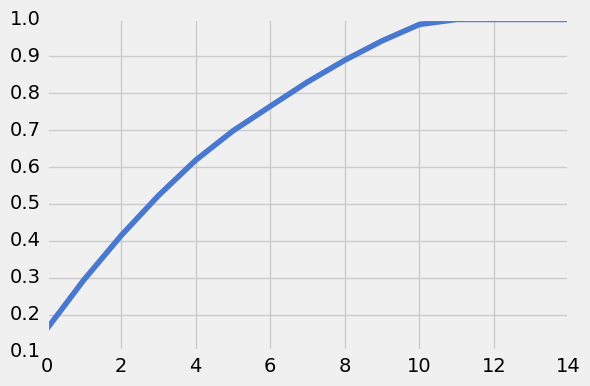

In [53]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [55]:
finalDf = pd.concat([principalDf, PCA_df[['6mthsactive']]], axis = 1)
finalDf

,principal component 1,principal component 2,6mthsactive
0,2.621442,0.527937,0
1,-2.378408,-1.210685,0
2,-0.336558,0.608152,0
3,2.848338,0.655916,0
4,-1.893480,-0.677603,0
5,2.229191,-0.824532,0
6,-2.240193,-1.263485,0
7,-0.388175,0.299581,0
8,-2.196663,-1.513214,0
9,-2.419513,-1.089608,0


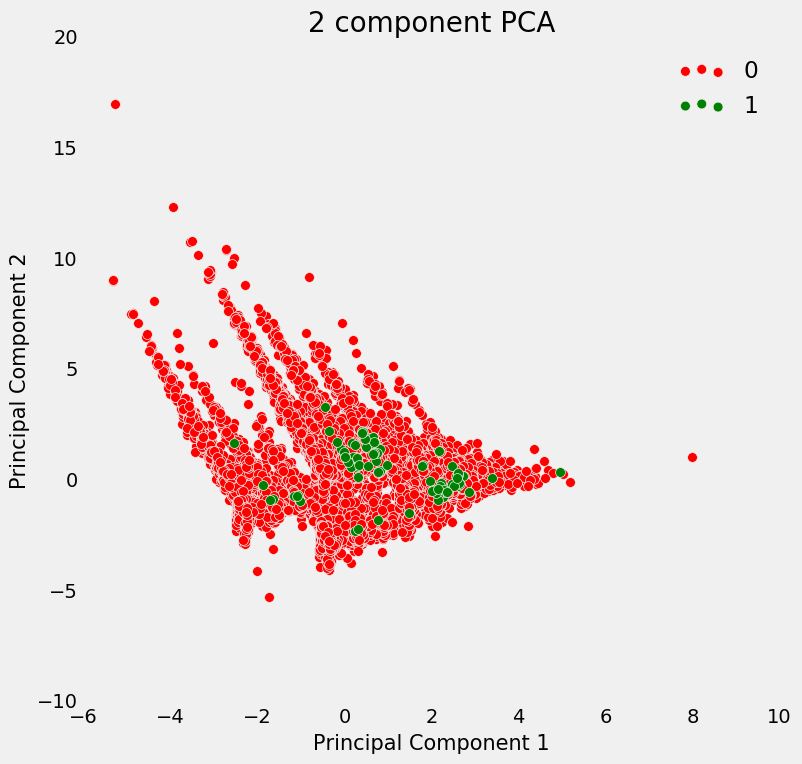

In [56]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['6mthsactive'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [57]:
Dummied_df_ultimate.head()

,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,signup_date,last_trip_date,avg_dist,avg_rating_by_driver,avg_rating_of_driver,surge_pct,avg_surge,trips_in_first_30_days,ultimate_black_user_False,ultimate_black_user_True,weekday_pct,active,6mthsactive
0,0,1,0,0,1,2014-01-25,2014-06-17,3.67,5.0,4.7,15.4,1.10,4,0,1,46.2,1,0
1,1,0,0,1,0,2014-01-29,2014-05-05,8.26,5.0,5.0,0.0,1.00,0,1,0,50.0,0,0
2,1,0,0,0,1,2014-01-06,2014-01-07,0.77,5.0,4.3,0.0,1.00,3,1,0,100.0,0,0
3,0,1,0,0,1,2014-01-10,2014-06-29,2.36,4.9,4.6,20.0,1.14,9,0,1,80.0,1,0
4,0,0,1,1,0,2014-01-27,2014-03-15,3.13,4.9,4.4,11.8,1.19,14,1,0,82.4,0,0


In [58]:
# Split original breast cancer data into features/target
X = Dummied_df_ultimate.drop(['signup_date','last_trip_date','6mthsactive'],axis=1).values
y = Dummied_df_ultimate['6mthsactive'].values

In [59]:
Dummied_df_ultimate.shape

(50000, 18)

In [60]:
# Split data into test/train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [69]:
# Build a pipeline of PCA w/ 10 components and a logistic regression
# NOTE: You should also scale your data; this will be an exercise for those
# eager ones out there
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix

logistic = linear_model.LogisticRegression()
pca = PCA(n_components=10)
pipe = Pipeline(steps=[('pca',pca), ('logistic', logistic)])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9983

In [65]:
from sklearn import tree
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix

clf = tree.DecisionTreeClassifier(max_depth=2)
# pca = PCA(n_components=10)
pipe = Pipeline(steps=[('pca',pca), ('clf', clf)])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)


0.9983

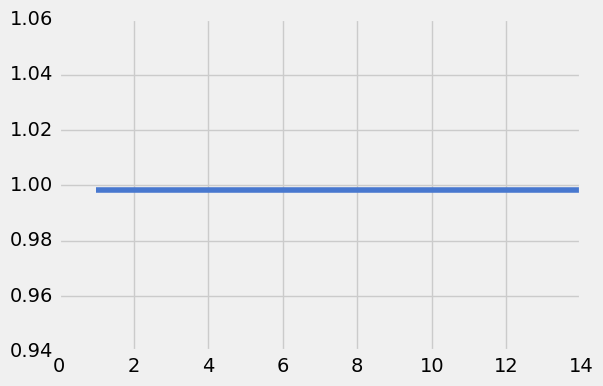

In [66]:
x1 = np.arange(1,15)
y1 = []
for i in x1:
        pca = PCA(n_components=i)
        pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])
        pipe.fit(X_train, y_train)
        y1.append(pipe.score(X_test, y_test))
plt.plot(x1, y1);

Part 3 
Q1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
A1. Used forward fill approach to fill NaN values with mean values for 'avg_rating_of_driver','avg_rating_by_driver' and 'phone'.
Next 'City', 'phone' and 'ultimate_black_user' were converted to dummy values of type 'int'.  Finally found the '6mthsactive' field by calculations which will be used for machine learning and predictions. 37.6% were found to be retained users.

Q2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance. 
A2.Using the Standard Scaling due to all field having varied scales, alongwith PCA (with atleast 10 components to explain the variance as shown in graph) alongwith the Logistic regression model gives us a 99.83% score which should provide good predictions.

Q3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).
A3.Ultimate can use the predicted data to improve retention by finding patterns if iPhone vs Android would be the better phone that has more retained users or if the City and/or it's location plays an actual role in retention. There could surges at certain times of the year or the weekday or weekends driving causes more retention.  The patterns could be found in understanding the user and demographics of users if obtained could explain further reasons for retention.